In [1]:
from PIL import Image # Read Images from the file location
import os 

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense, Dropout,BatchNormalization, Flatten, Conv2D, MaxPool2D,Input  # Layers to be used in CNN(Keras) Model
from keras.optimizers import RMSprop # It will compile the Model

from keras.preprocessing.image import ImageDataGenerator


Using TensorFlow backend.


In [2]:
# A function to upload test images or images from an uncategorized folder

def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        img=  img.convert('RGB')
        img = img.resize((150,150))
        img = np.array(img)
        img = img/255
        if img is not None:
            images.append(img)
    return images

In [3]:
# Loads the Names of thr Labels of the Images present in that folder

def load_names(folder):
    names = []
    for filename in os.listdir(folder):
        names.append(filename)
           
    return names

In [4]:
labels = pd.read_csv('train_label.csv')

## MODEL

In [56]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150,150,3)),
  
    MaxPool2D(pool_size=(2, 2)),
 
    Conv2D(32, (3, 3), activation='relu'),
  
    MaxPool2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),

    MaxPool2D(pool_size=(2, 2)),

    Flatten(),
    Dense(64,activation = 'relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1,activation = 'sigmoid')
])

### Compiling the Model

In [57]:
model.compile(loss='binary_crossentropy', optimizer= 'rmsprop' ,metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

# Importing Data

In [9]:
img_width, img_height = 150, 150

In [10]:
#ImageDataGenerator is an inbuilt Keras Function which deals with directories and Images
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

### Importing Train Data

In [40]:
train_dir = './train'

In [12]:
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    class_mode='binary')

Found 163 images belonging to 2 classes.


### Importing Test Data

In [13]:
test_dir = './test/test/'

In [14]:
test_labels = load_names(test_dir)

In [15]:
test_labels[0:5]

['test1.jpg', 'test10.jpg', 'test11.png', 'test12.jpeg', 'test13.jpeg']

In [16]:
test_images = load_images(test_dir)

In [17]:
type(test_images)

list

In [18]:
test_images = np.array(test_images)

In [20]:
type(test_images) # Because Keras models takes Tensors / Numpy Arrays as inputs

numpy.ndarray

In [64]:
test_images.shape

(24, 150, 150, 3)

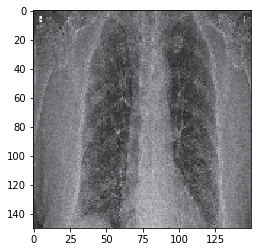

In [22]:
plt.imshow(test_images[0]) # Displays Image

Now we have imported the Test and Train data and normalized it accordingly

## Fitting the model

In [59]:
model.fit_generator(train_data,epochs = 2)

Epoch 1/2
6/6 [==============================] - 8s 1s/step - loss: 0.2845 - accuracy: 0.8896
Epoch 2/2
6/6 [==============================] - 8s 1s/step - loss: 0.2517 - accuracy: 0.8957


### Testing the Data i.e. making Predictions

In [60]:
predictions = model.predict(test_images)

In [71]:
predictions

array([[0.48137325],
       [0.49195042],
       [0.5299867 ],
       [0.51996315],
       [0.22253394],
       [0.3783897 ],
       [0.31882912],
       [0.30794448],
       [0.35643435],
       [0.34231967],
       [0.32206923],
       [0.48858374],
       [0.37480062],
       [0.34819797],
       [0.43243793],
       [0.3349055 ],
       [0.2870165 ],
       [0.52940863],
       [0.58197093],
       [0.5420637 ],
       [0.5819072 ],
       [0.30837274],
       [0.55732304],
       [0.44964835]])

### We take threshold to be 0.44

In [72]:
predictions = predictions > 0.44

In [73]:
predictions

array([[ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True]])

In [74]:
pred_int = np.zeros([24,])
for i in range(24):
    if predictions[i] == True:
        pred_int[i] = '1'
    else:
        pred_int[i] = '0'

In [75]:
pred_int

array([1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       1., 1., 1., 1., 0., 1., 1.])

## Now creating a csv file for submission

In [76]:
sub = pd.DataFrame({'image':test_labels,'label':pred_int})

In [77]:
sub.head()

,image,label
0,test1.jpg,1.0
1,test10.jpg,1.0
2,test11.png,1.0
3,test12.jpeg,1.0
4,test13.jpeg,0.0


In [78]:
sub.to_csv('Final_Submission.csv',index = False)

## DONE!!!